In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
%matplotlib inline

#### Question 2: compare K-Means and HAC performance in clustering animals in the zoo data set. Which algorithm gave better result (based on Orange’s class-to-cluster accuracy measure), in what parameter setting?

In [2]:
zoodf = pd.read_csv('zoo.csv')
zoodf.shape

(101, 18)

In [3]:
zoodf['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [4]:
zoodf.head()

,animal-name,hair,feathers,egg,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo_arr = zoodf.drop(['animal-name','type'],axis=1).values # removing 'type' and 'animal-name' columns
zoo_arr[:10]

array([[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 1, 1],
       [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 0, 1, 0]], dtype=int64)

# K - Means Clustering

#### Elbow method for finding number of clusters (K value)

In [6]:
SSE_cluster = []
for i in range(2,11): # choosing 10 clusters
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(zoo_arr) # Compute k-means clustering
    SSE_cluster.append(kmeans.inertia_)

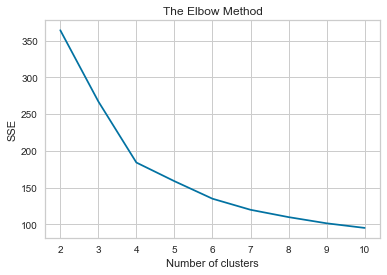

In [45]:
plt.plot(range(2,11),SSE_cluster) # plotting numbers of clusers vs SSE
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


#### Number of clusters will be 4

In [27]:
# Fitting K means to the dataset
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=0)

In [28]:
y_kmeans = kmeans.fit_predict(zoo_arr) # Compute cluster centers and predict cluster index for each sample
y_kmeans # contains index of the cluster each sample belongs to

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 3, 3, 2, 0, 1, 1, 2, 2,
       0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 1, 0, 0, 2, 1, 3, 3, 2, 3, 2,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 3, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 3, 1, 2,
       3, 0, 0, 0, 1, 0, 0, 2, 0, 3, 0, 1, 2])

In [29]:
kmeans.cluster_centers_ # cluster centroids

array([[ 8.63636364e-01, -8.32667268e-17,  1.59090909e-01,
         8.63636364e-01,  4.54545455e-02,  1.59090909e-01,
         5.22727273e-01,  9.54545455e-01,  1.00000000e+00,
         1.00000000e+00,  2.27272727e-02,  2.27272727e-02,
         3.68181818e+00,  8.18181818e-01,  1.81818182e-01,
         6.81818182e-01],
       [ 4.34782609e-02, -5.55111512e-17,  8.26086957e-01,
         1.30434783e-01, -1.38777878e-16,  7.82608696e-01,
         7.39130435e-01,  8.26086957e-01,  8.26086957e-01,
         3.04347826e-01,  1.73913043e-01,  6.95652174e-01,
         0.00000000e+00,  7.82608696e-01,  4.34782609e-02,
         3.04347826e-01],
       [-1.66533454e-16,  1.00000000e+00,  1.00000000e+00,
        -1.66533454e-16,  8.00000000e-01,  3.00000000e-01,
         4.50000000e-01,  1.11022302e-16,  1.00000000e+00,
         1.00000000e+00, -1.38777878e-17, -2.77555756e-17,
         2.00000000e+00,  1.00000000e+00,  1.50000000e-01,
         3.00000000e-01],
       [ 2.85714286e-01,  0.00000000e

#### VALIDATING THE CLUSTER MODEL WITH SILHOUETTE SCORE

In [30]:
score = silhouette_score(zoo_arr, y_kmeans)
score # 0.46 is a good score as it closer to 1

0.45722583958295593

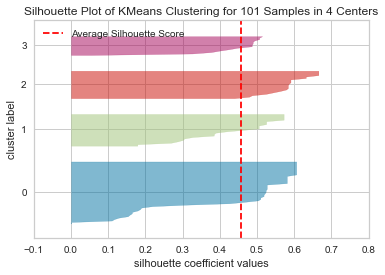

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 101 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
#Using Silhouette Plot
visualizer = SilhouetteVisualizer(kmeans,colors =  'yellowbrick')

#Fit the data to the visualizer
visualizer.fit(zoo_arr)       

#Render the figure
visualizer.show()

In [35]:
# confusion matrix
confustion_matrix = pd.crosstab(zoodf['type'],y_kmeans,rownames=['Actual'],colnames=['Predicted'])
confustion_matrix

Predicted,0,1,2,3
Actual,,,,
1,38,3,0,0
2,0,0,20,0
3,2,3,0,0
4,0,13,0,0
5,4,0,0,0
6,0,0,0,8
7,0,4,0,6


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

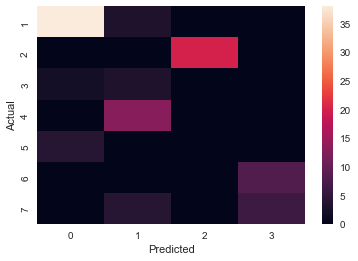

In [36]:
sns.heatmap(confustion_matrix)

# Hierarchial Clustering

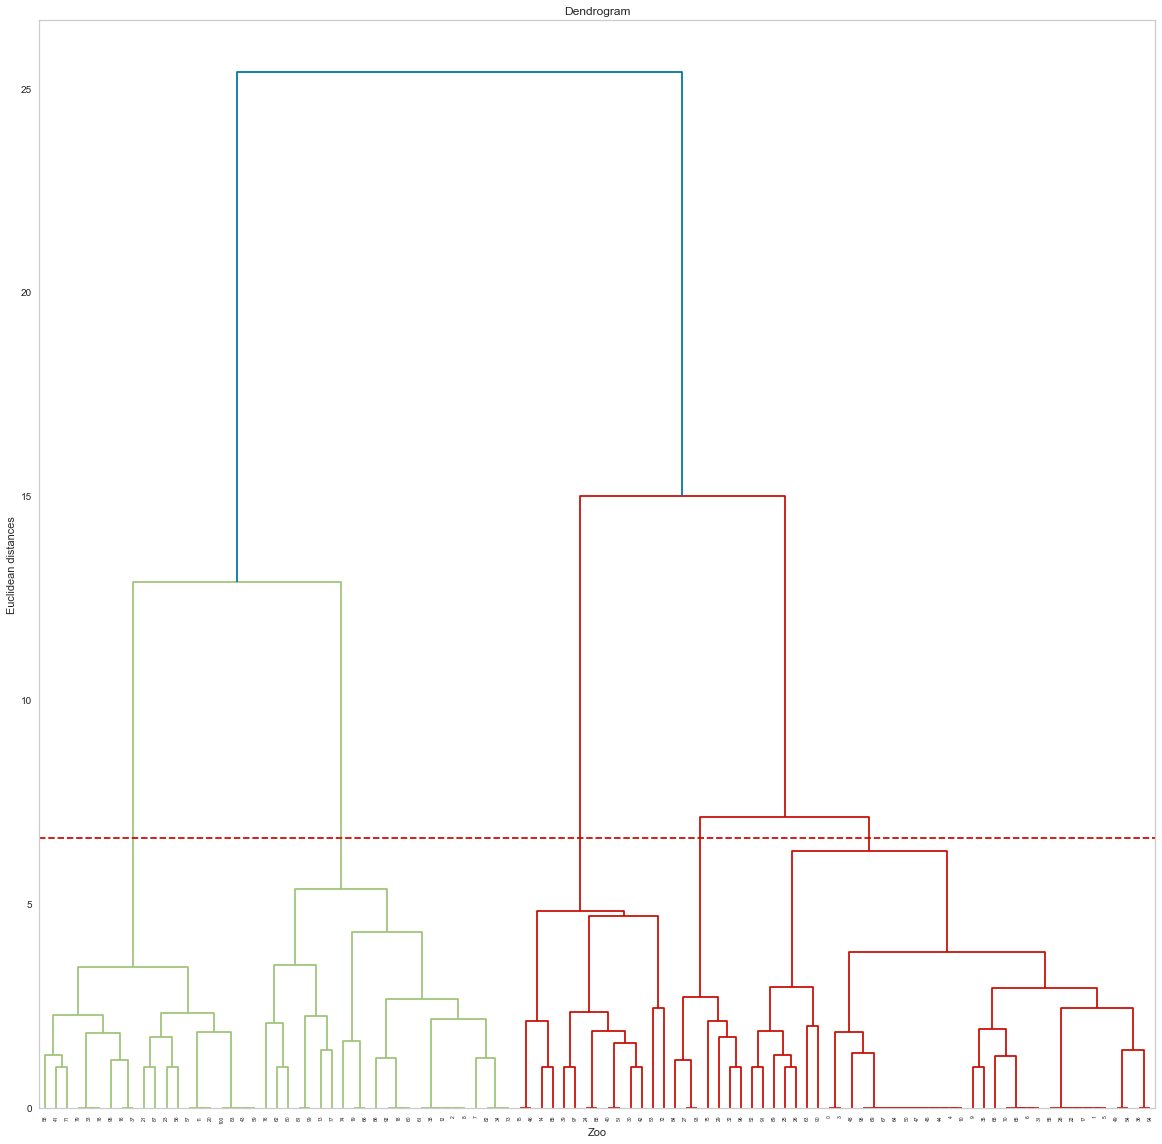

In [43]:
# dendogram to find number of clusters
plt.figure(figsize=(20, 20))  

dendrogram_comp = sch.dendrogram(sch.linkage(zoo_arr, method  = "ward"), 
                            orientation='top')
plt.title('Dendrogram')
plt.xlabel('Zoo')
plt.ylabel('Euclidean distances')
plt.axhline(y=6.6, color='r', linestyle='--')
plt.grid(b=None)


#### From the above dendogram, we can conclude that 5 clustering can be possible

In [37]:
# Fitting hierarchical clustering to the Zoo dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
predicted = hc.fit_predict(zoo_arr)
predicted[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [39]:
# confusion matrix
confustion_matrix = pd.crosstab(zoodf['type'],predicted,rownames=['Actual'],colnames=['Predicted'])
confustion_matrix

Predicted,0,1,2,3,4
Actual,,,,,
1,31,3,0,0,7
2,0,0,0,20,0
3,2,3,0,0,0
4,0,13,0,0,0
5,4,0,0,0,0
6,0,0,8,0,0
7,0,4,6,0,0


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

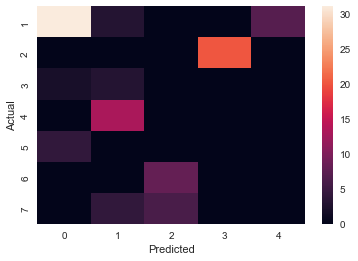

In [42]:
sns.heatmap(confustion_matrix)

#### CONCLUSION

from the confusion matrix caluclated above, K- Means seems to be better model compared to hieararchial clustering with ward method